In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
data = pd.read_csv("/content/drive/MyDrive/Password_Strength_Checker Dataset.csv")
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [15]:
data['strength'].unique()

array([1, 2, 0])

In [16]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [17]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [18]:
data.dropna(inplace=True)

In [19]:
data.isnull().sum()

password    0
strength    0
dtype: int64

In [21]:
data['strength'] = data['strength'].astype('int64')

<Axes: ylabel='Frequency'>

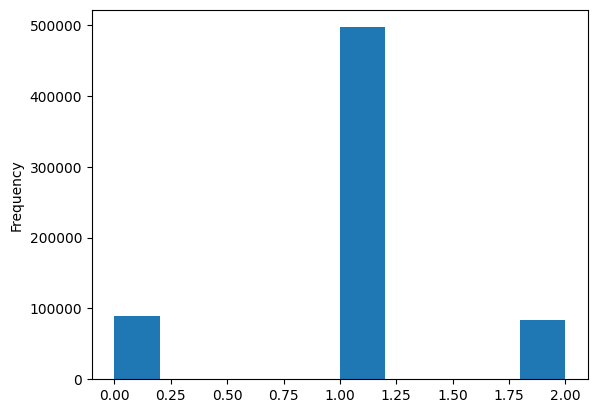

In [26]:
data.strength.plot.hist()

In [27]:
password_tuple=np.array(data)

In [28]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

**shuffling randomly for robustness**

In [29]:
import random
random.shuffle(password_tuple)

In [30]:
x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]


In [31]:
x[:10]

['kzde5577',
 'kino3434',
 'visi7k1yr',
 'megzy123',
 'kzde5577',
 'AVYq1lDE4MgAZfNt',
 'u6c8vhow',
 'AVYq1lDE4MgAZfNt',
 'visi7k1yr',
 'lamborghin1']

#### create a custom function to split input into characters of list

In [32]:
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [33]:
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

#### import TF-IDF vectorizer to convert String data into numerical data


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

#### apply TF-IDF vectorizer on data

In [37]:
X=vectorizer.fit_transform(x)

In [38]:
X.shape

(669639, 125)

In [40]:
vectorizer.get_feature_names_out()

array(['\x05', '\x08', '\x10', '\x11', '\x12', '\x13', '\x16', '\x17',
       '\x19', '\x1b', '\x1c', '\x1d', '\x1e', ' ', '!', '"', '#', '$',
       '%', '&', '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?', '@',
       '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g',
       'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
       'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\x81',
       '\x8d', '¡', '¨', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¹', 'º',
       '¼', '¾', '¿', 'ß', 'à', 'á', 'â', 'ä', 'å', 'æ', 'ç', 'ê', 'í',
       'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', '÷', 'ù', 'ú', 'û', 'ü', 'ý',
       'þ', 'ÿ', '‚', '™'], dtype=object)

In [41]:
first_document_vector=X[0]
first_document_vector

<1x125 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [42]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56614643],
        [0.        ],
        [0.59230104],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [44]:
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names_out(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False)

,TF-IDF
7,0.592301
5,0.566146
z,0.336141
k,0.291636
d,0.285803
...,...
9,0.000000
8,0.000000
6,0.000000
4,0.000000


*italicized text*#### split data into train & test

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [47]:
X_train.shape

(535711, 125)

In [48]:
from sklearn.linear_model import LogisticRegression

#### Apply Logistic on data as use-cas is Classification

In [49]:
clf=LogisticRegression(random_state=0,multi_class='multinomial')

In [50]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

#### doing prediction for specific custom data

In [51]:
dt=np.array(['%@123abcd'])
pred=vectorizer.transform(dt)
clf.predict(pred)

array([2])

In [52]:
y_pred=clf.predict(X_test)
y_pred

array([2, 1, 1, ..., 2, 2, 1])

#### check Accuracy of your model using confusion_matrix,accuracy_score

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [54]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[ 5282 12655    15]
 [ 3888 92911  2547]
 [   30  5142 11458]]
0.8187309599187623



```
# This is formatted as code
```

##### create report of your model

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.29      0.39     17952
           1       0.84      0.94      0.88     99346
           2       0.82      0.69      0.75     16630

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928



In [58]:
# Import pickle Package
import pickle

In [60]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_RL_Model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(clf, file)

In [61]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

LogisticRegression(multi_class='multinomial', random_state=0)

In [64]:
# Use the Reloaded Model to
# Calculate the accuracy score and predict target values

# Calculate the Score
score = Pickled_LR_Model.score(X_test, y_test)
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(X_test)

Ypredict

Test score: 81.87 %


array([2, 1, 1, ..., 2, 2, 1])